Week 1 to 3 are basics

Reading Data

Data Processing and Cleaning

Summarizing data

Visualization

Deriving insights from data

# Week 4 and supporting lectures

# Classification and Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import *



In [2]:
dataset_url = "https://raw.githubusercontent.com/gshanbhag525/Programming-Knowledge-/master/income.csv"
data_income = pd.read_csv("https://raw.githubusercontent.com/gshanbhag525/Programming-Knowledge-/master/income.csv")
data = data_income.copy()

In [3]:
data.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [5]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [7]:
# No missing values

In [8]:
# Summary of numerical variables
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [9]:
# Summary of Categorical variables
data.describe(include='O')

# unique tells the number of categories available under that variable
# top tells you the maximum number repeated category under that variable
# frequency tells the number of times that top category is repeated under that variable

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [10]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [11]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
print(np.unique(data['JobType']))


[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [13]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [14]:
# Now we want to replace ? with NA values

data = pd.read_csv('https://raw.githubusercontent.com/gshanbhag525/Programming-Knowledge-/master/income.csv',na_values=[" ?"])
data.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [15]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [16]:
# print value counts for each column
# data['occupation'].value_counts()
columns = data.columns

In [17]:
for eachElement in columns:
  print("-------------------------------------------------")
  print("The value counts for the column:",eachElement)
  print(data[str(eachElement)].value_counts())
  print("-------------------------------------------------")

-------------------------------------------------
The value counts for the column: age
36    875
23    871
31    870
34    862
33    862
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
-------------------------------------------------
-------------------------------------------------
The value counts for the column: JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
-------------------------------------------------
-------------------------------------------------
The value counts for the column: EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th        

In [18]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [19]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [20]:
missing = data[data.isnull().any(axis=1)]

In [21]:
missing.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [22]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [23]:
neverworked = data[data['JobType']=='Never-worked']

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/gshanbhag525/Programming-Knowledge-/master/income.csv',na_values=[" ?"])
data.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [25]:
neverworked = data[data['JobType']==' Never-worked']

In [26]:
neverworked

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
4825,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
10215,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
14073,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
19542,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,"less than or equal to 50,000"
22385,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,"less than or equal to 50,000"
31296,30,Never-worked,HS-grad,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
31305,18,Never-worked,Some-college,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,"less than or equal to 50,000"


In [27]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [28]:
final_data = data.dropna(axis=0)

In [29]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [31]:
correlation = final_data.corr()

In [32]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [33]:
# none of the variables are correlated to each other

In [34]:
final_data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [35]:
gender_proportion = pd.crosstab(index=final_data['gender'],columns='count',normalize=True)

In [36]:
print(gender_proportion)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [37]:
# Gender Vs salary

In [38]:
gender_salary = pd.crosstab(index=final_data['gender'],columns=final_data['SalStat'],margins=True,normalize = 'index')

In [39]:
gender_salary

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


In [40]:
# Frequency Distribution of Salary Status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


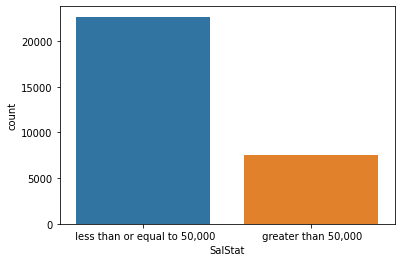

In [41]:
SalStat = sns.countplot(final_data['SalStat'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


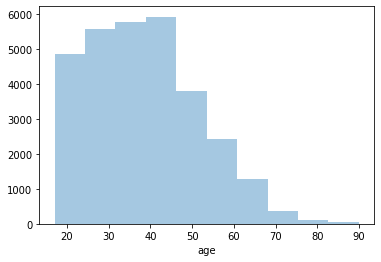

In [42]:
sns.distplot(final_data['age'],bins=10,kde=False)
# frequencies on y axis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


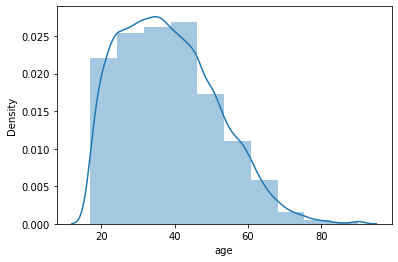

In [43]:
sns.distplot(final_data['age'],bins=10)
# frequencies on y axis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


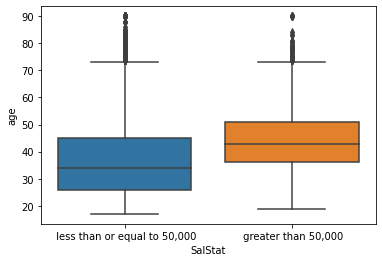

In [44]:
sns.boxplot('SalStat','age',data=final_data)

In [45]:
final_data.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

In [46]:
#Exploratory Data Analysis DIY

In [47]:
# Logistic regression

In [48]:
df2 = final_data

In [49]:
df2['SalStat'] = df2['SalStat'].map({ ' less than or equal to 50,000':0,' greater than 50,000':1})
print(np.unique(df2['SalStat']))

[0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df3 = pd.get_dummies(df2, drop_first=True)

In [51]:
df3

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
columns_list = list(df3.columns)
features = list(set(columns_list)-set(['SalStat']))

In [53]:
features

['race_ White',
 'capitalgain',
 'nativecountry_ Poland',
 'EdType_ 5th-6th',
 'relationship_ Unmarried',
 'nativecountry_ Holand-Netherlands',
 'occupation_ Tech-support',
 'EdType_ Prof-school',
 'EdType_ 7th-8th',
 'EdType_ Preschool',
 'relationship_ Other-relative',
 'JobType_ Self-emp-inc',
 'maritalstatus_ Married-AF-spouse',
 'occupation_ Craft-repair',
 'nativecountry_ Philippines',
 'nativecountry_ Iran',
 'age',
 'nativecountry_ Honduras',
 'JobType_ State-gov',
 'nativecountry_ Yugoslavia',
 'occupation_ Protective-serv',
 'nativecountry_ Hungary',
 'occupation_ Exec-managerial',
 'nativecountry_ Italy',
 'nativecountry_ Ecuador',
 'nativecountry_ Hong',
 'JobType_ Private',
 'nativecountry_ England',
 'nativecountry_ Laos',
 'maritalstatus_ Separated',
 'occupation_ Armed-Forces',
 'EdType_ Some-college',
 'maritalstatus_ Widowed',
 'occupation_ Farming-fishing',
 'nativecountry_ El-Salvador',
 'nativecountry_ Nicaragua',
 'relationship_ Own-child',
 'EdType_ 9th',
 'hours

In [54]:
y = df3['SalStat'].values

In [55]:
x = df3[features].values

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [57]:
model = linear_model.LogisticRegression()

In [58]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
prediction = model.predict(x_test)

In [60]:
cmatrix = metrics.confusion_matrix(y_test,prediction)

In [61]:
cmatrix

array([[6271,  508],
       [ 927, 1343]])

In [62]:
accuracy = metrics.accuracy_score(y_test,prediction)

In [63]:
accuracy

0.8414189413194828

In [64]:
print((y_test!=prediction).sum())

1435


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


In [66]:
df2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [67]:
columnstoremove = ['gender','nativecountry','race','JobType']

In [68]:
df3 = df2.drop(columnstoremove,axis=1)

In [69]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   EdType         30162 non-null  object
 2   maritalstatus  30162 non-null  object
 3   occupation     30162 non-null  object
 4   relationship   30162 non-null  object
 5   capitalgain    30162 non-null  int64 
 6   capitalloss    30162 non-null  int64 
 7   hoursperweek   30162 non-null  int64 
 8   SalStat        30162 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.6+ MB


In [70]:
df3 = pd.get_dummies(df3,drop_first=True)

In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   30162 non-null  int64
 1   capitalgain                           30162 non-null  int64
 2   capitalloss                           30162 non-null  int64
 3   hoursperweek                          30162 non-null  int64
 4   SalStat                               30162 non-null  int64
 5   EdType_ 11th                          30162 non-null  uint8
 6   EdType_ 12th                          30162 non-null  uint8
 7   EdType_ 1st-4th                       30162 non-null  uint8
 8   EdType_ 5th-6th                       30162 non-null  uint8
 9   EdType_ 7th-8th                       30162 non-null  uint8
 10  EdType_ 9th                           30162 non-null  uint8
 11  EdType_ Assoc-acdm                    301

In [72]:
columns_list_for_training = list(df3.columns)

In [73]:
columns_list_for_training

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ N

In [74]:
features_list = list(set(columns_list_for_training)-set(['SalStat']))
print(features_list)

['hoursperweek', 'capitalgain', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'EdType_ 5th-6th', 'EdType_ HS-grad', 'maritalstatus_ Never-married', 'relationship_ Unmarried', 'occupation_ Prof-specialty', 'occupation_ Tech-support', 'relationship_ Own-child', 'EdType_ Prof-school', 'occupation_ Sales', 'EdType_ 7th-8th', 'capitalloss', 'EdType_ Assoc-voc', 'EdType_ Preschool', 'relationship_ Other-relative', 'maritalstatus_ Married-spouse-absent', 'EdType_ 1st-4th', 'maritalstatus_ Married-AF-spouse', 'occupation_ Craft-repair', 'EdType_ Doctorate', 'occupation_ Other-service', 'age', 'EdType_ 12th', 'relationship_ Wife', 'EdType_ Masters', 'EdType_ Bachelors', 'occupation_ Protective-serv', 'occupation_ Exec-managerial', 'occupation_ Priv-house-serv', 'EdType_ Assoc-acdm', 'maritalstatus_ Separated', 'EdType_ 11th', 'occupation_ Armed-Forces', 'EdType_ Some-college', 'maritalstatus_ Widowed', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'maritalst

In [75]:
df3

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [76]:
y = df3['SalStat'].values

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
np.unique(y)

array([0, 1])

In [79]:
x = df3[features_list].values

In [80]:
x

array([[28,  0,  0, ...,  0,  0,  0],
       [40,  0,  0, ...,  0,  0,  0],
       [40,  0,  0, ...,  1,  0,  0],
       ...,
       [40,  0,  0, ...,  1,  0,  0],
       [40,  0,  0, ...,  1,  0,  0],
       [40,  0,  0, ...,  0,  0,  0]])

In [81]:
x.shape

(30162, 43)

In [82]:
y.shape

(30162,)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [84]:
model = linear_model.LogisticRegression()

In [85]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
prediction = model.predict(x_test)

In [87]:
cmatrix = metrics.confusion_matrix(y_test,prediction)

In [88]:
cmatrix

array([[6286,  502],
       [ 973, 1288]])

In [89]:
accuracy = metrics.accuracy_score(y_test,prediction)

In [90]:
accuracy

0.8369985633771687

In [91]:
print((y_test!=prediction).sum())

1475


In [92]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
classifier = KNeighborsClassifier(n_neighbors = 5)

In [93]:
classifier.fit(x_train,y_train)
predictions = classifier.predict(x_test)


In [94]:
metrics.confusion_matrix(y_test,predictions)

array([[6156,  632],
       [ 903, 1358]])

In [95]:
metrics.accuracy_score(y_test, prediction)

0.8369985633771687

In [96]:
#To get best value of K

In [97]:
misclassified=[]
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  misclassified.append((y_test!=pred_i).sum())

print(misclassified)

[1704, 1537, 1570, 1491, 1535, 1478, 1513, 1476, 1486, 1452, 1450, 1436, 1421, 1427, 1445, 1431, 1428, 1444, 1449]


# Linear Regression

In [98]:
#https://dl3.pushbulletusercontent.com/pI0UZ0UmdjnOtBhLimxtx0Tuy4STMSlH/cars_sampled.csv

In [99]:
car_data = pd.read_csv("https://dl3.pushbulletusercontent.com/pI0UZ0UmdjnOtBhLimxtx0Tuy4STMSlH/cars_sampled.csv")
car_data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [100]:
cars = car_data.copy()

In [101]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [102]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [103]:
pd.set_option('display.float_format',lambda x:'%.3f' % x)

In [104]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [105]:
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [106]:
to_drop_columns = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(to_drop_columns,axis=1)

In [107]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


In [108]:
cars.drop_duplicates(keep='first',inplace=True)

In [109]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [110]:
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()

In [111]:
sum(cars['yearOfRegistration']>2018)

26

In [112]:
sum(cars['yearOfRegistration']<1950)

38

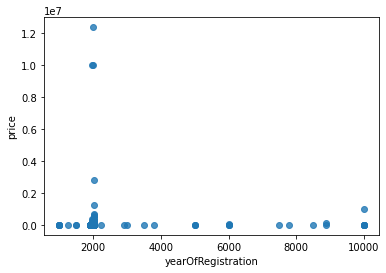

In [113]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False, data=cars)

In [114]:
# Dropping unwanted data
cars = cars[
            (cars.yearOfRegistration<=2018) & (cars.yearOfRegistration >=1950) & (cars.price >=100) & (cars.price <= 150000) & (cars.powerPS >=10) & (cars.powerPS <=500)
]


In [115]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               42772 non-null  object
 1   offerType            42772 non-null  object
 2   price                42772 non-null  int64 
 3   abtest               42772 non-null  object
 4   vehicleType          39896 non-null  object
 5   yearOfRegistration   42772 non-null  int64 
 6   gearbox              41978 non-null  object
 7   powerPS              42772 non-null  int64 
 8   model                41089 non-null  object
 9   kilometer            42772 non-null  int64 
 10  monthOfRegistration  42772 non-null  int64 
 11  fuelType             40175 non-null  object
 12  brand                42772 non-null  object
 13  notRepairedDamage    36495 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [116]:
cars['monthOfRegistration'] /=12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
cars['Age'] = (2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
cars.Age

0       15.250
1       13.500
2       15.920
3       13.000
4       10.920
         ...  
49991   14.670
49992   20.750
49993   19.670
49995   17.250
50000   12.830
Name: Age, Length: 42772, dtype: float64

In [119]:
cars.Age.describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [121]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   seller               42772 non-null  object 
 1   offerType            42772 non-null  object 
 2   price                42772 non-null  int64  
 3   abtest               42772 non-null  object 
 4   vehicleType          39896 non-null  object 
 5   yearOfRegistration   42772 non-null  int64  
 6   gearbox              41978 non-null  object 
 7   powerPS              42772 non-null  int64  
 8   model                41089 non-null  object 
 9   kilometer            42772 non-null  int64  
 10  monthOfRegistration  42772 non-null  float64
 11  fuelType             40175 non-null  object 
 12  brand                42772 non-null  object 
 13  notRepairedDamage    36495 non-null  object 
 14  Age                  42772 non-null  float64
dtypes: float64(2), int64(4), object(9)
m

In [122]:
cars = cars.drop(columns=['monthOfRegistration','yearOfRegistration'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


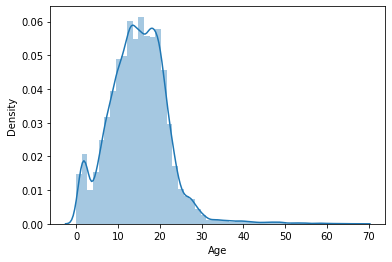

In [123]:
sns.distplot(cars['Age'])

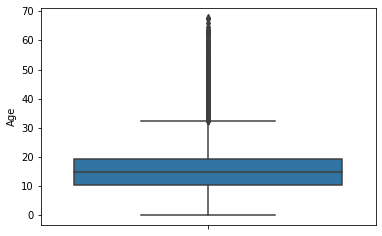

In [124]:
sns.boxplot(y=cars['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


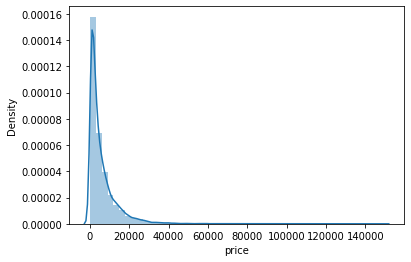

In [125]:
sns.distplot(cars['price'])

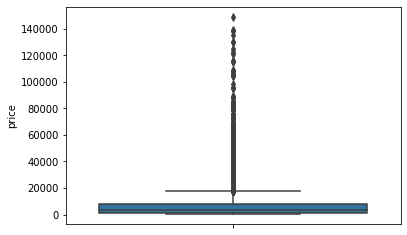

In [126]:
sns.boxplot(y=cars['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


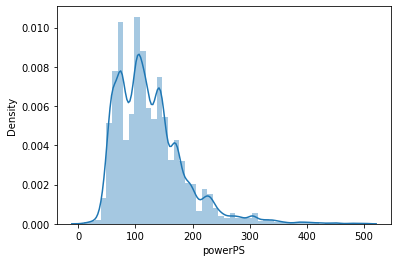

In [128]:
sns.distplot(cars['powerPS'])


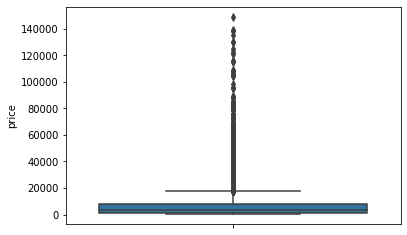

In [129]:
sns.boxplot(y=cars['price'])

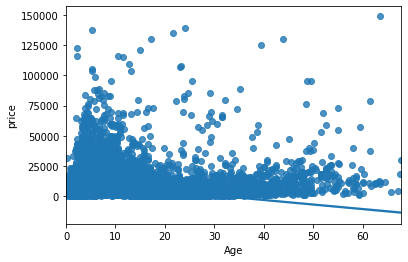

In [130]:
sns.regplot(x = 'Age', y = 'price', scatter = True, data = cars)


In [131]:
# All new cars are highly priced 
# With increase in Age the price decreases
# Vintage cars are the ones which inspite of being older are highly priced

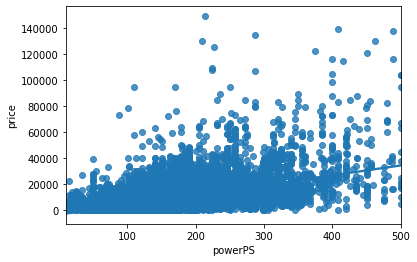

In [132]:
sns.regplot(x = 'powerPS', y = 'price', scatter = True, data = cars)


In [134]:
cars['seller'].value_counts()


private       42771
commercial        1
Name: seller, dtype: int64

In [135]:
pd.crosstab(cars['seller'], columns ='count', normalize = True)


col_0,count
seller,
commercial,0.000
private,1.000


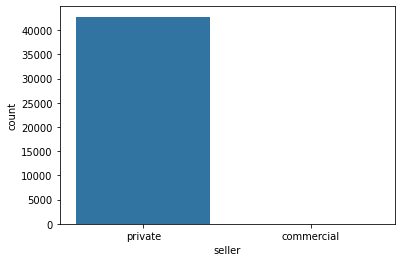

In [136]:
sns.countplot(x='seller',data = cars)


offer    42772
Name: offerType, dtype: int64


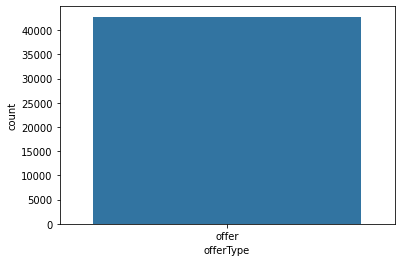

In [137]:
print(cars['offerType'].value_counts())
sns.countplot(x='offerType',data = cars)


In [138]:
print(pd.crosstab(cars['offerType'], columns ='count', normalize = True))
print(cars['abtest'].value_counts())


col_0      count
offerType       
offer      1.000
test       22128
control    20644
Name: abtest, dtype: int64


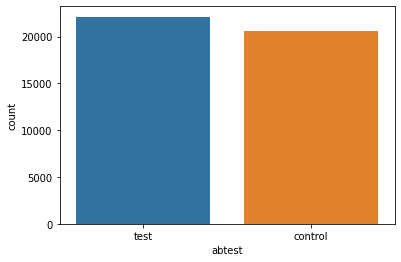

In [139]:
sns.countplot(x='abtest',data = cars)


In [141]:
cars['vehicleType'].value_counts()


limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

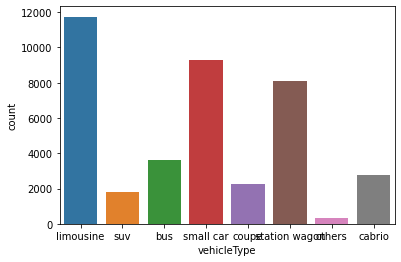

In [142]:
sns.countplot(x='vehicleType',data = cars)


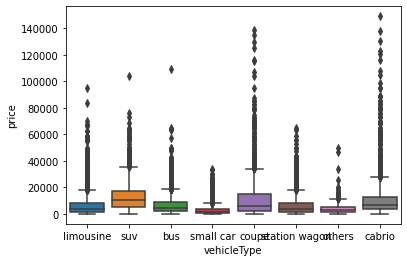

In [145]:
sns.boxplot(x='vehicleType', y ='price',data = cars)


In [146]:
cars['gearbox'].value_counts()


manual       32582
automatic     9396
Name: gearbox, dtype: int64

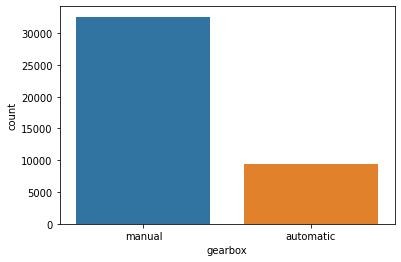

In [147]:
sns.countplot(x='gearbox',data = cars)


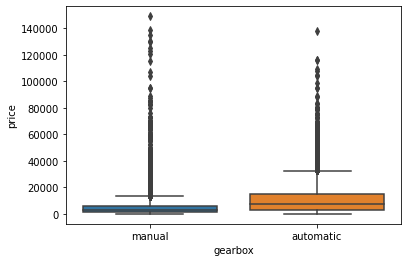

In [148]:
sns.boxplot(x='gearbox', y ='price',data = cars)


In [149]:
cars['model'].value_counts()


golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
rangerover       1
serie_3          1
200              1
elefantino       1
b_max            1
Name: model, Length: 247, dtype: int64

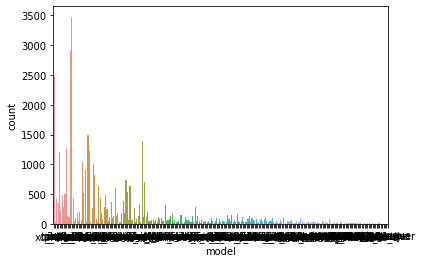

In [150]:
sns.countplot(x='model',data = cars)


In [151]:
cars['kilometer'].value_counts().sort_index()


5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

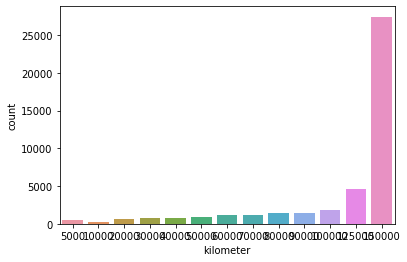

In [152]:
sns.countplot(x='kilometer',data = cars)


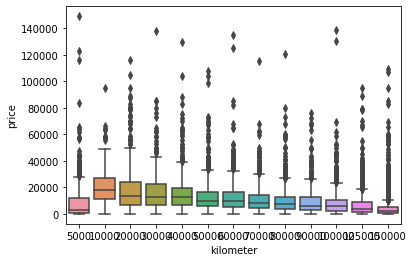

In [153]:
sns.boxplot(x='kilometer', y ='price',data = cars)


In [154]:
cars['fuelType'].value_counts()


petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

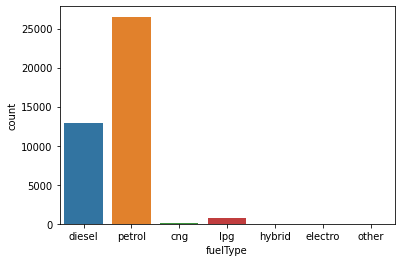

In [155]:
sns.countplot(x='fuelType',data = cars)


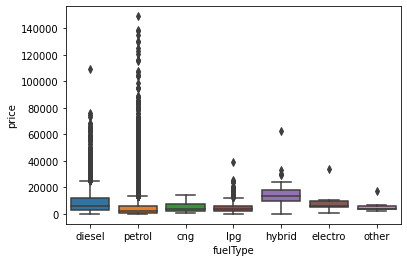

In [156]:
sns.boxplot(x='fuelType', y ='price',data = cars)


In [157]:

cars['brand'].value_counts()


volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [158]:
pd.crosstab(cars['brand'], columns='count',normalize = True)


col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


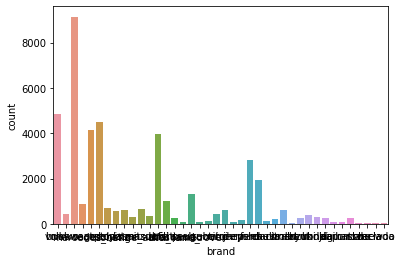

In [159]:
sns.countplot(x='brand',data = cars)


In [160]:
cars['notRepairedDamage'].value_counts()


no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

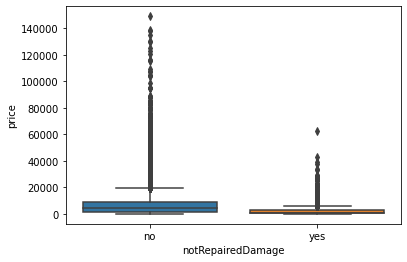

In [161]:
sns.boxplot(x='notRepairedDamage', y ='price',data = cars)


In [162]:
col = ['seller','offerType','abtest']
cars = cars.drop(columns = col, axis = 1)
cars.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [163]:
cars2 = cars.copy()
car_select = cars.select_dtypes(exclude = [object])
correlation = car_select.corr()
correlation

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [164]:
correlation.loc[:,'price'].abs().sort_values(ascending = False)[1:]


powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [165]:
cars2.head()


,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [166]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              42772 non-null  int64  
 1   vehicleType        39896 non-null  object 
 2   gearbox            41978 non-null  object 
 3   powerPS            42772 non-null  int64  
 4   model              41089 non-null  object 
 5   kilometer          42772 non-null  int64  
 6   fuelType           40175 non-null  object 
 7   brand              42772 non-null  object 
 8   notRepairedDamage  36495 non-null  object 
 9   Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 4.8+ MB


In [167]:
car_omit = cars2.dropna(axis = 0)
car_omit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 1 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              32884 non-null  int64  
 1   vehicleType        32884 non-null  object 
 2   gearbox            32884 non-null  object 
 3   powerPS            32884 non-null  int64  
 4   model              32884 non-null  object 
 5   kilometer          32884 non-null  int64  
 6   fuelType           32884 non-null  object 
 7   brand              32884 non-null  object 
 8   notRepairedDamage  32884 non-null  object 
 9   Age                32884 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.8+ MB


In [168]:
car_omit = pd.get_dummies(car_omit, drop_first = True) # Drop first category once divided into columns
car_omit.head()

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [169]:
from sklearn.model_selection import train_test_split     # Required for dividing data into train and test set
from sklearn.linear_model import LinearRegression      # Import library for Linear Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [170]:
x1 = car_omit.drop(['price'],axis ='columns',inplace = False)
y1 = car_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f808dda6910>,
      dtype=object)

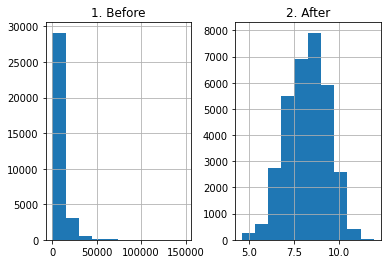

In [171]:
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()

In [172]:
y1 = np.log(y1)
y1

1       9.495
3       8.412
4       9.839
5       6.896
7       7.244
         ... 
49991   9.297
49992   6.672
49993   6.721
49995   7.736
50000   7.003
Name: price, Length: 32884, dtype: float64

In [173]:
train_x,test_x,train_y,test_y = train_test_split(x1,y1,test_size=0.3,random_state=3)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [174]:
base_pred = np.mean(test_y)
print(base_pred)


8.249615787653337


In [175]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(test_y))
base_pred

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [176]:
base_RMSE = np.sqrt(mean_squared_error(test_y,base_pred))
print(base_RMSE)

1.1274483657478247


In [177]:
lgr = LinearRegression(fit_intercept = True)


In [178]:
model_lin1 = lgr.fit(train_x,train_y)   # Model
car_pred = lgr.predict(test_x)          # Predicting model on Test Set
lin_MSE = mean_squared_error(test_y,car_pred)
lin_RMSE = np.sqrt(lin_MSE)
print(lin_RMSE)


0.5455481266513843


In [179]:
r2_lin_test = model_lin1.score(test_x,test_y)
r2_lin_train = model_lin1.score(train_x,train_y)
print(r2_lin_test,r2_lin_train)

0.7658615091649241 0.7800936978183916


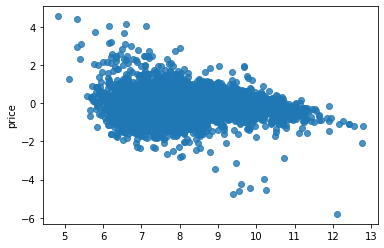

In [180]:
residual = test_y - car_pred
sns.regplot(x = car_pred, y = residual, scatter = True,fit_reg = False, data =car_omit)


In [181]:
residual.describe()


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

In [182]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'auto',
                          max_depth = 100, min_samples_split = 10,
                          min_samples_leaf=4,random_state = 1)
# n_estimators - No. of Trees in the forest
# max_depth - Depth of each tree
# min_samples_split - Min. no. of samples required for a node to split
# min_samples_leaf - Min. no. of samples required at a leaf node
# max_features - No. of features to consider when looking for the best split
model_rf = rf.fit(train_x,train_y)
car_pred1 = rf.predict(test_x) 
rf_MSE = mean_squared_error(test_y,car_pred1)
rf_RMSE = np.sqrt(rf_MSE)
print(rf_RMSE)

r2_rf_test = model_rf.score(test_x,test_y)
r2_rf_train = model_rf.score(train_x,train_y)
print(r2_rf_test,r2_rf_train)

0.4360736289370223
0.8504018147750623 0.9202494705146291


In [184]:
car_imputed = cars2.apply(lambda x: x.fillna(x.median()) \
                             if x.dtype == 'float' else \
                             x.fillna(x.value_counts().index[0]))
car_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f808db3b8d0>,
      dtype=object)

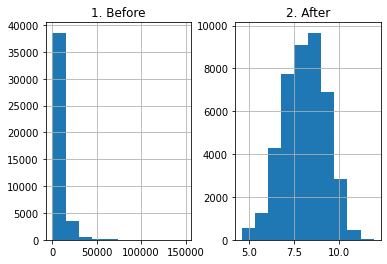

In [185]:
car_imputed = pd.get_dummies(car_imputed, drop_first = True)
x11 = car_imputed.drop(['price'],axis ='columns',inplace = False)
y11 = car_imputed['price']
prices1 = pd.DataFrame({"1. Before": y11, "2. After": np.log(y11)})
prices1.hist()

In [186]:
y11 = np.log(y11)
train_x1,test_x1,train_y1,test_y1 = train_test_split(x11,y11,test_size=0.3,random_state=3)

In [187]:
base_pred1 = np.mean(test_y1)
print(base_pred1)
base_pred1 = np.repeat(base_pred1, len(test_y1))
base_pred1

8.068391740519193


array([8.06839174, 8.06839174, 8.06839174, ..., 8.06839174, 8.06839174,
       8.06839174])

In [188]:
base_RMSE1 = np.sqrt(mean_squared_error(test_y1,base_pred1))
print(base_RMSE1)

lgr1 = LinearRegression(fit_intercept = True)
model_lin11 = lgr1.fit(train_x1,train_y1)   # Model
car_pred1 = lgr1.predict(test_x1)
lin_MSE1 = mean_squared_error(test_y1,car_pred1)
lin_RMSE1 = np.sqrt(lin_MSE1)
print(lin_RMSE1)

1.1884349112889792
0.6483956449231308


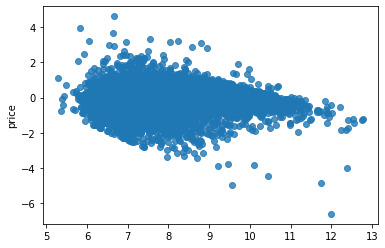

In [189]:
residual1 = test_y1 - car_pred1
sns.regplot(x = car_pred1, y = residual1, scatter = True,fit_reg = False, data =car_imputed)

In [190]:
rf1 = RandomForestRegressor(n_estimators = 100, max_features = 'auto',
                          max_depth = 100, min_samples_split = 10,
                          min_samples_leaf=4,random_state = 1)
model_rf1 = rf1.fit(train_x1,train_y1)
car_pred11 = rf1.predict(test_x1) 
rf_MSE1 = mean_squared_error(test_y1,car_pred11)
rf_RMSE1 = np.sqrt(rf_MSE1)
print(rf_RMSE1)
r2_rf_test1 = model_rf1.score(test_x1,test_y1)
r2_rf_train1 = model_rf1.score(train_x1,train_y1)
print(r2_rf_test1,r2_rf_train1)

0.494313994408829
0.8269964521311131 0.9024289431669166
